# SVM

### Szymon Szewczyk

In [1]:
import pandas as pd
import numpy as np
 
from sklearn import svm
 
import matplotlib.pyplot as plt

In [2]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

In [3]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

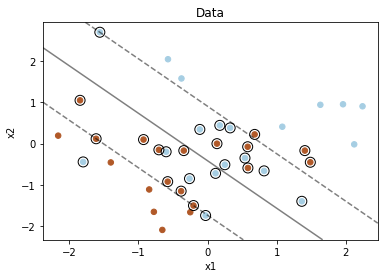

In [4]:
fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

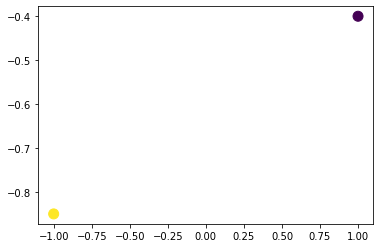

In [5]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

In [6]:
# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


In [45]:
# from get_vocabulary_dict import get_vocabulary_dict
# vocabulary_dict = get('data/vocab.txt')

dictionary = {}
with open("C:/Users/szyme/Documents/Studia/VI Semestr/ML/lab_6/svm_spam__skeleton/data/vocab.txt", encoding="utf-8") as file:
 for line in file:
 
    (key, value) = line.split()
 
    dictionary[int(key)] = value
 
print ('\ntext file to dictionary=\n',dictionary)   


text file to dictionary=
 {1: 'aa', 2: 'ab', 3: 'abil', 4: 'abl', 5: 'about', 6: 'abov', 7: 'absolut', 8: 'abus', 9: 'ac', 10: 'accept', 11: 'access', 12: 'accord', 13: 'account', 14: 'achiev', 15: 'acquir', 16: 'across', 17: 'act', 18: 'action', 19: 'activ', 20: 'actual', 21: 'ad', 22: 'adam', 23: 'add', 24: 'addit', 25: 'address', 26: 'administr', 27: 'adult', 28: 'advanc', 29: 'advantag', 30: 'advertis', 31: 'advic', 32: 'advis', 33: 'ae', 34: 'af', 35: 'affect', 36: 'affili', 37: 'afford', 38: 'africa', 39: 'after', 40: 'ag', 41: 'again', 42: 'against', 43: 'agenc', 44: 'agent', 45: 'ago', 46: 'agre', 47: 'agreement', 48: 'aid', 49: 'air', 50: 'al', 51: 'alb', 52: 'align', 53: 'all', 54: 'allow', 55: 'almost', 56: 'alon', 57: 'along', 58: 'alreadi', 59: 'alsa', 60: 'also', 61: 'altern', 62: 'although', 63: 'alwai', 64: 'am', 65: 'amaz', 66: 'america', 67: 'american', 68: 'among', 69: 'amount', 70: 'amp', 71: 'an', 72: 'analysi', 73: 'analyst', 74: 'and', 75: 'ani', 76: 'anim', 77:

In [123]:
import re
string = ""
with open("C:/Users/szyme/Documents/Studia/VI Semestr/ML/lab_6/svm_spam__skeleton/data/emailSample1.txt") as file:
    for line in file:
        # print(line)
        string += line.lower()
 
    # (key, value) = line.split()
 
    # dictionary[int(key)] = value
# print(string)

email_contents = re.sub('<[^<>]+>', ' ', string)
# print(email_contents)

email_contents = re.sub('\d+', 'number', email_contents)
# print(email_contents)

email_contents = re.sub('http[s]*://[\S]+', 'httpaddr', email_contents)
# print(email_contents)

email_contents = re.sub('[\S]+@[\S]+', 'emailaddr', email_contents)
print(email_contents)

email_contents = re.sub('[$]+', 'dollar', email_contents)
print(email_contents)

> anyone knows how much it costs to host a web portal ?
>
well, it depends on how many visitors you're expecting.
this can be anywhere from less than number bucks a month to a couple of $number. 
you should checkout httpaddr or perhaps amazon ecnumber 
if youre running something big..

to unsubscribe yourself from this mailing list, send an email to:
emailaddr


> anyone knows how much it costs to host a web portal ?
>
well, it depends on how many visitors you're expecting.
this can be anywhere from less than number bucks a month to a couple of dollarnumber. 
you should checkout httpaddr or perhaps amazon ecnumber 
if youre running something big..

to unsubscribe yourself from this mailing list, send an email to:
emailaddr




In [138]:
tokens = re.split('[ @$/#.-:&*\+=\[\]?!\(\)\{\},''">_<;#\n\r]', email_contents)
print(tokens)

# from svm_spam__skeleton import process_email as pe

# # process_email(string)
# print(pe.process_email(string))

['', '', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a', 'web', 'portal', '', '', '', '', 'well', '', 'it', 'depends', 'on', 'how', 'many', 'visitors', "you're", 'expecting', '', 'this', 'can', 'be', 'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a', 'month', 'to', 'a', 'couple', 'of', 'dollarnumber', '', '', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon', 'ecnumber', '', 'if', 'youre', 'running', 'something', 'big', '', '', '', 'to', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list', '', 'send', 'an', 'email', 'to', '', 'emailaddr', '', '']


In [155]:
from svm_spam__skeleton.get_vocabulary_dict import get_vocabulary_dict

n_words = 1899

w_indices = [86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]
x = np.zeros(n_words)
for idx in w_indices:
    x[idx - 1] = 1

x.reshape(-1,1)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])